In [1]:
# <!-- citation:
# @misc{rufat_triangle_2024,
#   author = {D. Rufat},
#   title = {{drufat/triangle}},
#   url = {\url{https://github.com/drufat/triangle}},
#   note = {Accessed: Apr. 17, 2024},
#   month = apr,
#   year = {2024}
# }

# @misc{jupyterwidgets_ipywidgets_2015,
#   author = {jupyter-widgets},
#   title = {{ipywidgets/docs/source/examples/Index.ipynb at main · jupyter-widgets/ipywidgets}},
#   url = {\url{https://github.com/jupyter-widgets/ipywidgets/blob/main/docs/source/examples/Index.ipynb}},
#   note = {Accessed: Apr. 17, 2024},
#   year = {2015}
# } -->


In [2]:
#3D Geometry Coursework 3 - Harmonic Coordinates for Character Articulation

#Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.spatial import Delaunay
from matplotlib.path import Path
import ipywidgets as widgets
import triangle as tr
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.tri as mtri

This script pertains to the main implementation of the project for harmonic coordinates for a 2D implementation, for the extension/novelty approach please see the file **3D_harmonic_coords.ipynb**

Character creation + Cage creation - Clara Zard

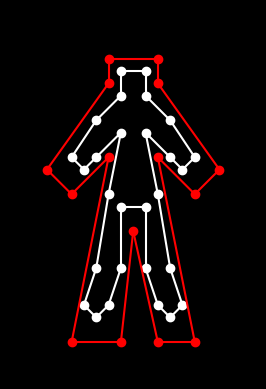

In [3]:
#DRAWING THE MESH AND ITS CAGE

#Coords of vertices for 2D human figure

character_vertices={
    #Upper body
    'head_top_left': (9, 25),
    'head_top_right': (11, 25),
    'head_bottom_left': (9, 23),
    'head_bottom_right': (11, 23),
    'elbow_left': (7, 21),
    'elbow_right': (13, 21),
    'hand_left_top': (5, 18),
    'hand_left_right': (7, 18),
    'hand_left_bottom': (6, 17),
    'hand_right_top': (15, 18),
    'hand_right_left': (13, 18),
    'hand_right_bottom': (14, 17),
    'chest_left': (9, 20),
    'chest_right': (11, 20),
    #Lower body
    'body_bottom_left': (8, 15),
    'body_bottom_right': (12, 15),
    'outer_knee_left': (7, 9),
    'inner_knee_right': (9, 9),
    'inner_leg_left': (9, 14),
    'inner_leg_right': (11, 14),
    'inner_knee_left': (11, 9),
    'outer_knee_right': (13, 9),
    'foot_top_left': (6, 6),
    'foot_top_right': (8, 6),
    'foot_left_bottom': (7, 5),
    'foot_left_top': (12, 6),
    'foot_right_top': (14, 6),
    'foot_right_bottom': (13, 5),
}

#Vertices that form the edges
character_edges=[
    ('head_top_left', 'head_top_right'),
    ('head_top_left', 'head_bottom_left'),
    ('head_top_right', 'head_bottom_right'),
    ('head_bottom_left', 'elbow_left'),
    ('elbow_left', 'hand_left_top'),
    ('hand_left_top', 'hand_left_bottom'),
    ('hand_left_bottom', 'hand_left_right'),
    ('hand_left_right', 'chest_left'),
    ('chest_left', 'body_bottom_left'),
    ('body_bottom_left', 'outer_knee_left'),
    ('outer_knee_left', 'foot_top_left'),
    ('foot_top_left', 'foot_left_bottom'),
    ('foot_left_bottom', 'foot_top_right'),
    ('foot_top_right', 'inner_knee_right'),
    ('inner_knee_right', 'inner_leg_left'),
    ('inner_leg_left', 'inner_leg_right'),
    ('inner_leg_right', 'inner_knee_left'),
    ('inner_knee_left', 'foot_left_top'),
    ('foot_left_top', 'foot_right_bottom'),
    ('foot_right_bottom', 'foot_right_top'),
    ('foot_right_top', 'outer_knee_right'),
    ('outer_knee_right', 'body_bottom_right'),
    ('body_bottom_right', 'chest_right'),
    ('chest_right', 'hand_right_left'),
    ('hand_right_left', 'hand_right_bottom'),
    ('hand_right_bottom', 'hand_right_top'),
    ('hand_right_top', 'elbow_right'),
    ('elbow_right', 'head_bottom_right'),
]

#Define the vertices for the cage
cage_vertices={
    'cage_top_head_left': (8, 26),
    'cage_top_head_right': (12, 26),
    'cage_bottom_head_left': (8, 24),
    'cage_bottom_head_right': (12, 24),
    'cage_lefthand_left': (3, 17),
    'cage_lefthand_right': (5, 15),
    'cage_righthand_left': (15, 15),
    'cage_righthand_right': (17, 17),
    'cage_innerarm_left': (8, 18),
    'cage_innerarm_right': (12, 18),
    'cage_leftfoot_bottom_left': (5, 3),
    'cage_leftfoot_bottom_right': (9, 3),
    'cage_rightfoot_bottom_left': (12, 3),
    'cage_rightfoot_bottom_right': (15, 3),
    'cage_innerleg': (10, 12),
}
#Define the edges for the cage
cage_edges=[
    ('cage_top_head_left', 'cage_top_head_right'),
    ('cage_top_head_right', 'cage_bottom_head_right'),
    ('cage_bottom_head_right', 'cage_righthand_right'),
    ('cage_righthand_right', 'cage_righthand_left'),
    ('cage_righthand_left', 'cage_innerarm_right'),
    ('cage_innerarm_right', 'cage_rightfoot_bottom_right'),
    ('cage_rightfoot_bottom_right', 'cage_rightfoot_bottom_left'),
    ('cage_rightfoot_bottom_left', 'cage_innerleg'),
    ('cage_innerleg', 'cage_leftfoot_bottom_right'),
    ('cage_leftfoot_bottom_right', 'cage_leftfoot_bottom_left'),
    ('cage_leftfoot_bottom_left', 'cage_innerarm_left'),
    ('cage_innerarm_left', 'cage_lefthand_right'),
    ('cage_lefthand_right', 'cage_lefthand_left'),
    ('cage_lefthand_left', 'cage_bottom_head_left'),
    ('cage_bottom_head_left', 'cage_top_head_left'),
]

#Define the control vertice's initial position for the cage deformation
initial_control_verts={
    'cage_top_head_left': (6, 28),  
    'cage_top_head_right': (12, 26), 
    'cage_lefthand_left': (3, 17),  
    'cage_righthand_right': (17, 17), 
    'cage_leftfoot_bottom_left': (5, 3),  
    'cage_rightfoot_bottom_right': (15, 3), 
}

#Generate new figure
fig,ax=plt.subplots()

#Draw vertices with white dots
for v in character_vertices.values():
    ax.plot(v[0],v[1],'wo')  

#Draw character edges with white lines
for ce in character_edges:
    x_Vals = [character_vertices[ce[0]][0], character_vertices[ce[1]][0]]
    y_Vals = [character_vertices[ce[0]][1], character_vertices[ce[1]][1]]
    ax.plot(x_Vals,y_Vals,'w-') 

#Draw cage vertices with red dots
for v in cage_vertices.values():
    ax.plot(v[0],v[1],'ro')

#Draw cage edges with red lines
for ce in cage_edges:
    x_Vals = [cage_vertices[ce[0]][0], cage_vertices[ce[1]][0]]
    y_Vals = [cage_vertices[ce[0]][1], cage_vertices[ce[1]][1]]
    ax.plot(x_Vals,y_Vals,'r-')

# # Draw control vertices with blue dots
# for v in initial_control_verts.values():
#     ax.plot(v[0], v[1], 'bo')

#Make proportions equal
ax.set_aspect('equal')

#Background colour is black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

#Remove axis
plt.axis('off')

#Define region of plot bigger than figure
plt.xlim(0, 20)
plt.ylim(0, 30)

#Show plot
plt.show()


Defining a simple cage deformation - Clara Zard

{'cage_top_head_left': (-2, 2), 'cage_top_head_right': (0, 0), 'cage_lefthand_left': (0, 0), 'cage_righthand_right': (0, 0), 'cage_leftfoot_bottom_left': (0, 0), 'cage_rightfoot_bottom_right': (0, 0)}
{'cage_top_head_left': (6, 28), 'cage_top_head_right': (12, 26), 'cage_bottom_head_left': (8, 24), 'cage_bottom_head_right': (12, 24), 'cage_lefthand_left': (3, 17), 'cage_lefthand_right': (5, 15), 'cage_righthand_left': (15, 15), 'cage_righthand_right': (17, 17), 'cage_innerarm_left': (8, 18), 'cage_innerarm_right': (12, 18), 'cage_leftfoot_bottom_left': (5, 3), 'cage_leftfoot_bottom_right': (9, 3), 'cage_rightfoot_bottom_left': (12, 3), 'cage_rightfoot_bottom_right': (15, 3), 'cage_innerleg': (10, 12)}


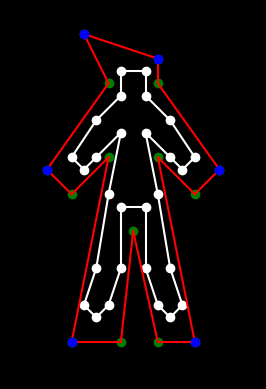

In [4]:
#CAGE DEFORMATION

#Calculate cage deformation
def calcCageDeformation(initial_control_verts, cage_vertices):
    #Initialise empty dictionary
    deformation={}
    #Loop over key value pair in the cage vertices
    for key, val in cage_vertices.items():
        #Check if there is a control vertex for the current cage vertex
        if key in initial_control_verts:
            #Get coords of control vertex
            control_vertex = initial_control_verts[key]
            #Calculate difference for x and y coords between control vertex and current cage vertex
            dx = control_vertex[0]-val[0]
            dy = control_vertex[1]-val[1]
            deformation[key] = (dx,dy)
    return deformation

#Apply cage deformation to the vertices of the cage
def applyCageDeformation(cage_vertices,deformation):
    #Create empty dictionary
    deformed_cage_vertices={}
    #Loop over key value pair in the cage vertices
    for key, val in cage_vertices.items():
        #Check if there is deformation calculated for the current cage vertex
        if key in deformation:
            #Get deformation coords
            dx,dy = deformation[key]
            #Update vertices
            deformed_cage_vertices[key] =(val[0]+dx, val[1]+dy)
        else:
            #Else there is no deformation so the coords remain unchanged
            deformed_cage_vertices[key] =val 
    return deformed_cage_vertices

#Calculate cage deformation
deformation = calcCageDeformation(initial_control_verts, cage_vertices)
#For debugging 
print(deformation)

#Apply cage deformation to cage vertices
deformed_cage_vertices = applyCageDeformation(cage_vertices, deformation)
#For debugging
print(deformed_cage_vertices)

#Create new figure
fig,ax=plt.subplots()

#Draw vertices of mesh with white dots
for cv in character_vertices.values():
    ax.plot(cv[0],cv[1],'wo')  

#Draw edges of mesh with white lines
for ce in character_edges:
    x_Vals = [character_vertices[ce[0]][0], character_vertices[ce[1]][0]]
    y_Vals = [character_vertices[ce[0]][1], character_vertices[ce[1]][1]]
    ax.plot(x_Vals, y_Vals, 'w-') 

#Draw deformed cage vertices with green dots
for v in deformed_cage_vertices.values():
    ax.plot(v[0],v[1],'go')

#Draw cage edges with red lines
for ce in cage_edges:
    x_Vals = [deformed_cage_vertices[ce[0]][0], deformed_cage_vertices[ce[1]][0]]
    y_Vals = [deformed_cage_vertices[ce[0]][1], deformed_cage_vertices[ce[1]][1]]
    ax.plot(x_Vals, y_Vals, 'r-')

#Draw control vertices with blue dots
for v in initial_control_verts.values():
    ax.plot(v[0],v[1],'bo')

#Make proportions equal
ax.set_aspect('equal')

#Background colour is black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

#Remove axis
plt.axis('off')

#Define region of plot bigger than figure
plt.xlim(0, 20)
plt.ylim(0, 30)

#Show plot
plt.show()

Character and Cage Triangulation - Rudrapriya Padmanabhan

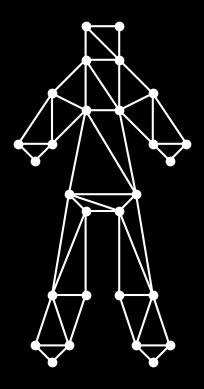

In [5]:

vertex_labels = list(character_vertices.keys())


segments = [(vertex_labels.index(start), vertex_labels.index(end)) for start, end in character_edges]


vertices_array = np.array(list(character_vertices.values()))

#perform triangulation using Triangle Library
triangulate_input = {
    'vertices': vertices_array,  # The vertices as an Nx2 array
    'segments': np.array(segments)  # The boundary segments
}
# Perform the triangulation

constrained_triangulation = tr.triangulate(triangulate_input, 'p')

# Plot the triangulation
fig, ax = plt.subplots()
ax.triplot(constrained_triangulation['vertices'][:, 0], constrained_triangulation['vertices'][:, 1], constrained_triangulation['triangles'], 'w-')
ax.plot(constrained_triangulation['vertices'][:, 0], constrained_triangulation['vertices'][:, 1], 'wo')
ax.set_aspect('equal')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.axis('off')
plt.show()


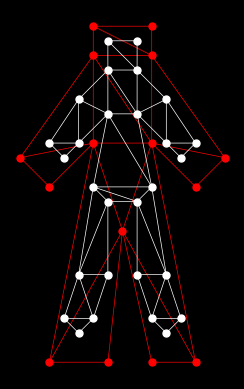

In [6]:

cage_vertices_array = np.array(list(cage_vertices.values()))

# dictionary that maps vertex labels to their indices
vertex_label_to_index = {label: idx for idx, label in enumerate(cage_vertices.keys())}

# creating index pairs from label pairs
cage_edges_indexed = [(vertex_label_to_index[start], vertex_label_to_index[end])
                      for start, end in cage_edges]

# for cage alone
cage_triangulate_input = {
    'vertices': cage_vertices_array,  # Cage vertices
    'segments': np.array(cage_edges_indexed)  # Cage segments
}

triangulation_options = {
    'p': None,  # Preserve the input segments
    'a': 0.01  # Maximum triangle area - smaller values result in finer meshes
}

# Perform triangulation with the refinement options
cage_triangulation_refined = tr.triangulate(cage_triangulate_input, triangulation_options)


# The vertices will be the same as the input vertices we used for the triangulation (cage_vertices_array)
# The triangles are the output from the triangulation, which we can access with 'triangles'
refined_cage_triangles = cage_triangulation_refined['triangles']

# triangle object for refined cage
cage_triang = mtri.Triangulation(cage_vertices_array[:, 0], cage_vertices_array[:, 1], refined_cage_triangles)


#plotting features
fig, ax = plt.subplots()

# cage defined with red lines 
ax.triplot(cage_triang, 'r-', linewidth=0.5)

# vertices of the refined cage with red dots
ax.plot(cage_vertices_array[:, 0], cage_vertices_array[:, 1], 'ro', markersize=5)

#Triangulation object for the character, refined
char_triang = mtri.Triangulation(
    constrained_triangulation['vertices'][:, 0],
    constrained_triangulation['vertices'][:, 1],
    constrained_triangulation['triangles']
)

# constrained triangulation of the character in white
ax.triplot(char_triang, 'w-', linewidth=0.5)

#character boundary vertices with white dots
ax.plot(char_triang.x, char_triang.y, 'wo', markersize=5)


ax.set_aspect('equal')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.axis('off')

# Display the plot
plt.show()



Laplacian, Boundary Conditions, Building the Harmonic Coordinates - Rudrapriya Padmanabhan

In [7]:
def cross_2d(v1, v2):
    return v1[0]*v2[1] - v1[1]*v2[0]

# 2D cross product for cotangent 
def cotangent(v0, v1, v2):
    u1 = v1 - v0
    u2 = v2 - v0
    dot_product = np.dot(u1, u2)
    cross_product_norm = np.linalg.norm(cross_2d(u1, u2))
    if cross_product_norm == 0:
        return 0
    cot = dot_product / cross_product_norm
    return cot

# Ensure that the vertices are in an Nx2 numpy array not Nx3
def construct_laplacian_matrix(vertices, triangles):
    num_vertices = len(vertices)
    L = scipy.sparse.lil_matrix((num_vertices, num_vertices))
    for tri in triangles:
        # Index of the vertices of the triangle
        i, j, k = tri
        # Positions of the vertices of the triangle
        v0, v1, v2 = vertices[i], vertices[j], vertices[k]
        
        # Cotangent weights
        cot01 = cotangent(v0, v1, v2)
        cot02 = cotangent(v0, v2, v1)
        cot12 = cotangent(v1, v2, v0)
        
        # Update the Laplacian matrix
        L[i, j] += cot12
        L[j, i] += cot12
        L[i, k] += cot01
        L[k, i] += cot01
        L[j, k] += cot02
        L[k, j] += cot02

        L[i, i] += -cot12 - cot01
        L[j, j] += -cot12 - cot02
        L[k, k] += -cot01 - cot02
    
    return L.tocsr() 


In [8]:

cage_vertices_array = np.array(list(cage_vertices.values()))
refined_triangles = cage_triangulation_refined['triangles']

#Laplacian matrix for the cage vertices using the refined triangulation
L_cage = construct_laplacian_matrix(cage_vertices_array, refined_triangles)

# right-hand side (RHS) as zero, initialisation
#With shape of [number_of_cage_vertices, number_of_cage_vertices]
rhs = np.zeros((len(cage_vertices_array), len(cage_vertices_array)))

# Each cage vertex is a boundary condition itself
for i, vertex_index in enumerate(range(len(cage_vertices_array))):
    rhs[vertex_index, i] = 1

# Apply boundary conditions for each cage vertex
L_cage_with_bc = L_cage.copy()
for vertex_index in range(len(cage_vertices_array)):
    L_cage_with_bc[vertex_index, :] = 0
    L_cage_with_bc[vertex_index, vertex_index] = 1

# Solve the linear system for each set of boundary conditions
# This will give us the harmonic basis functions for the cage vertices
cage_harmonic_functions = np.array([
    scipy.sparse.linalg.spsolve(L_cage_with_bc, rhs[:, i])
    for i in range(len(cage_vertices_array))
])

/Users/rudrapriya/miniconda3/envs/geo_tutorials/lib/python3.9/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Visualising the harmonic functions basis choice of vertex

In [9]:

def plot_harmonic_functions(vertex_index, cage_vertices_array, cage_triangulation_refined, cage_harmonic_functions, cmap_type='seismic'):
    # Normalize the harmonic function values for better color mapping
    harmonic_function = cage_harmonic_functions[vertex_index]
    min_hf = np.min(harmonic_function)
    max_hf = np.max(harmonic_function)
    normalized_values = (harmonic_function - min_hf) / (max_hf - min_hf)

    # Calculate a color for each triangle by averaging the harmonic function values at its vertices
    triangles = cage_triangulation_refined['triangles']
    triangle_colors = normalized_values[triangles].mean(axis=1)  # Average values at the triangle vertices


    triangulation = mtri.Triangulation(
        cage_vertices_array[:, 0],
        cage_vertices_array[:, 1],
        triangles
    )

    # Create the plot
    fig, ax = plt.subplots()

    # Choose color map based on input parameter
    cmap = plt.cm.get_cmap(cmap_type)

    # Plot the refined triangulation with colors mapped by the averaged harmonic function
    ax.tripcolor(triangulation, facecolors=triangle_colors, cmap=cmap, edgecolors='none')

    # Highlight the specific vertex that the harmonic function corresponds to
    specific_vertex_coords = cage_vertices_array[vertex_index]
    ax.plot(specific_vertex_coords[0], specific_vertex_coords[1], 'yo', markersize=5, label='Chosen Vertex (Cage)')

    # Add a color bar to show the mapping from color to function value
    cbar = plt.colorbar(ax.tripcolor(triangulation, facecolors=triangle_colors, cmap=cmap), ax=ax)
    cbar.set_label('Harmonic Function Value')
    ax.set_aspect('equal')

    plt.axis('off')
    ax.legend()

    # Show the plot
    plt.show()

    return triangulation


/var/folders/jm/j34qzb4d02b47xlkygjfg1xc0000gn/T/ipykernel_38240/2523598096.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_type)


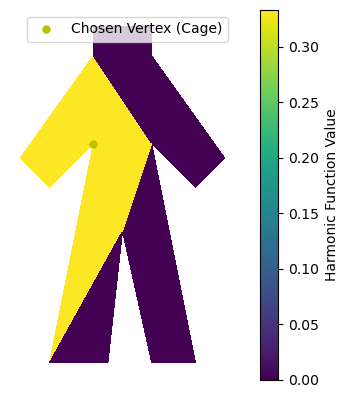

In [10]:
a = 8 # Example index for the second plot (0-14)
triangulation_res = plot_harmonic_functions(a, cage_vertices_array, cage_triangulation_refined, cage_harmonic_functions, cmap_type='viridis')

Deformation + Visualisation of Cage and Character deformation - Rudrapriya Padmanabhan

In [11]:
def compute_weights(character_vertices, cage_vertices):
    weights = {}
    for i, char_vert in enumerate(character_vertices):
        weights[i] = []
        total_weight = 0
        for j, cage_vert in enumerate(cage_vertices):
            # Compute the weight of cage vertex `j` on character vertex `i`
            weight = 1 / np.linalg.norm(np.array(char_vert) - np.array(cage_vert))
            weights[i].append((j, weight))
            total_weight += weight
        
        # Normalize weights
        weights[i] = [(j, w / total_weight) for (j, w) in weights[i]]
    
    return weights


def apply_cage_deformation_to_character(cage_vertices, deformed_cage_vertices, character_vertices, weights):
    deformed_character_vertices = np.zeros_like(character_vertices)
    for i in range(len(character_vertices)):
        new_pos = np.zeros(2)
        for (j, weight) in weights[i]:
            # Deform each character vertex based on the cage deformation and its associated weights
            new_pos += weight * (deformed_cage_vertices[j] - cage_vertices[j])
        deformed_character_vertices[i] = character_vertices[i] + new_pos
    return deformed_character_vertices


In [12]:
character_vertices_array = np.array(list(character_vertices.values()))
cage_vertices_array = np.array(list(cage_vertices.values()))
weights = compute_weights(character_vertices_array, cage_vertices_array)


In [13]:
class MeshVisualizer:
    def __init__(self, cage_vertices, character_vertices, weights, ax):
        self.cage_vertices = np.array(cage_vertices, dtype=np.float64)
        self.character_vertices = np.array(character_vertices, dtype=np.float64)
        self.weights = weights
        self.ax = ax
        self.fig = ax.figure
        self.deformed_cage_vertices = np.array(cage_vertices, copy=True)
        self.deformed_character_vertices = np.array(character_vertices, copy=True)
        self.plot_initial_state()

    def plot_initial_state(self):
        self.update_visualization(self.deformed_cage_vertices, self.deformed_character_vertices)

    def update_visualization(self, deformed_cage_vertices, deformed_character_vertices):
        self.ax.clear()
        # Plot the deformed cage
        # self.ax.plot(deformed_cage_vertices[:, 0], deformed_cage_vertices[:, 1], 'ro-', markersize=0.5)
        # Apply deformation to character mesh
        deformed_character_vertices = apply_cage_deformation_to_character(
            self.cage_vertices, deformed_cage_vertices, self.character_vertices, self.weights)
        # Create a triangulation from the deformed character vertices
        cage_triangles = cage_triangulation_refined['triangles']
        cage_triangulation = mtri.Triangulation(deformed_cage_vertices[:, 0], deformed_cage_vertices[:, 1], cage_triangles)
        character_triangles = constrained_triangulation['triangles']
        character_triangulation = mtri.Triangulation(deformed_character_vertices[:, 0], deformed_character_vertices[:, 1], character_triangles)
        
        self.ax.triplot(cage_triangulation, 'r-', linewidth=1.5, label='Cage Mesh')
        self.ax.triplot(character_triangulation, 'b-', linewidth=2.5, label='Character Mesh')
        self.ax.set_aspect('equal')
        self.ax.legend()
        self.fig.canvas.draw_idle()


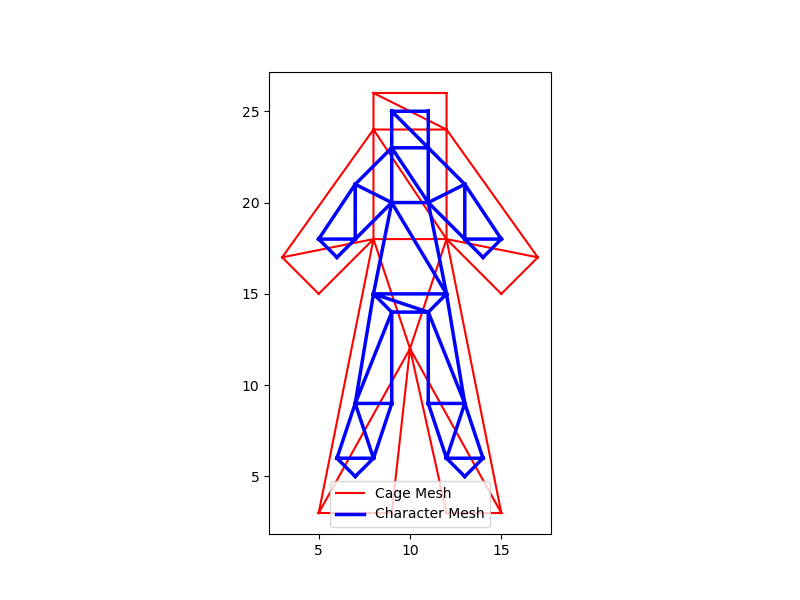

In [14]:

%matplotlib widget

def create_widgets(visualizer):
    dx_slider = widgets.FloatSlider(description='X Deformation', min=-10.0, max=10.0, step=0.01, value=0.0)
    dy_slider = widgets.FloatSlider(description='Y Deformation', min=-10.0, max=10.0, step=0.01, value=0.0)
    vertex_selector = widgets.Dropdown(description='Vertex', options={f'Vertex {i}': i for i in range(len(visualizer.cage_vertices))}, value=0)

    def on_change(change):
        idx = vertex_selector.value
        # Apply deformation
        deformed_cage_vertices = np.array(visualizer.cage_vertices, copy=True, dtype=np.float64)
        deformed_cage_vertices[idx] += np.array([dx_slider.value, dy_slider.value], dtype=np.float64)
        # Update both cage and character visualization
        visualizer.update_visualization(deformed_cage_vertices, visualizer.character_vertices)

    dx_slider.observe(on_change, names='value')
    dy_slider.observe(on_change, names='value')
    vertex_selector.observe(on_change, names='value')

    return widgets.VBox([vertex_selector, dx_slider, dy_slider])

# Setup the plot environment
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize the visualizer
visualizer = MeshVisualizer(cage_vertices_array, character_vertices_array, weights, ax)

# Create and display widgets
widgets_control = create_widgets(visualizer)
display(widgets_control)


